**DISTRIBUCIN NORMAL**

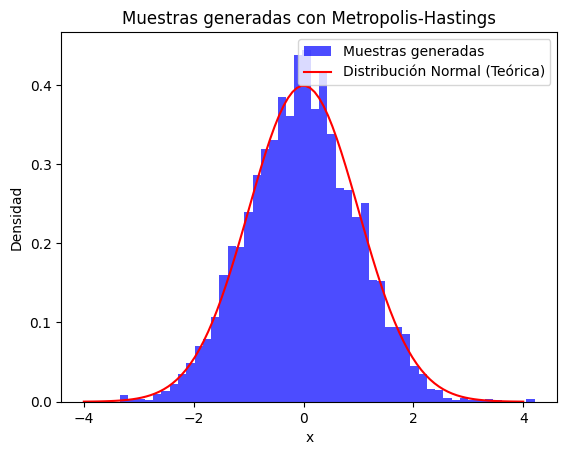

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la distribución objetivo: una distribución normal estándar
def target_distribution(x):
    return np.exp(-0.5 * x**2)

# Algoritmo Metropolis-Hastings
def metropolis_hastings(target_dist, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = initial_value

    for _ in range(num_samples):
        # Proponer un nuevo valor de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std)

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal) / target_dist(current_sample))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 1.0
initial_value = 0

# Generar las muestras
samples = metropolis_hastings(target_distribution, proposal_std, num_samples, initial_value)

# Graficar las muestras
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', label='Muestras generadas')
x = np.linspace(-4, 4, 100)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2), 'r', label='Distribución Normal (Teórica)')
plt.title('Muestras generadas con Metropolis-Hastings')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

**DISTRIBUCION CHI CUADRADA**

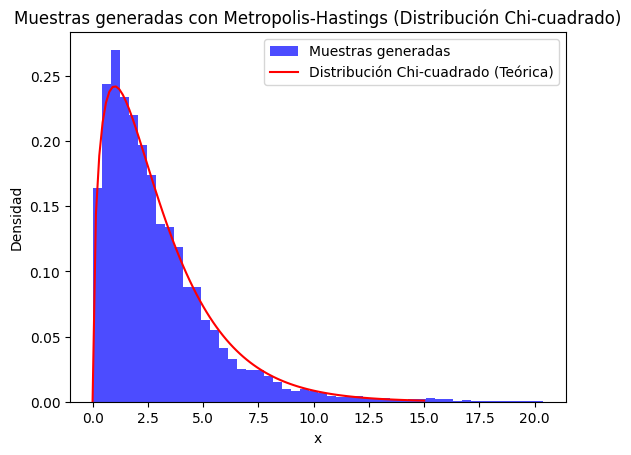

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Definimos la distribución objetivo: una distribución chi-cuadrado con k grados de libertad
def target_distribution(x, k):
    if x > 0:
        return chi2.pdf(x, k)
    else:
        return 0  # La distribución chi-cuadrado no está definida para x <= 0

# Algoritmo Metropolis-Hastings
def metropolis_hastings(target_dist, k, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = initial_value

    for _ in range(num_samples):
        # Proponer un nuevo valor de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std)

        # Asegurarse de que la propuesta es positiva (la chi-cuadrado solo está definida en el lado positivo)
        if proposal <= 0:
            proposal = current_sample

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal, k) / target_dist(current_sample, k))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 2.0
initial_value = 1.0
degrees_of_freedom = 3  # Grados de libertad de la distribución chi-cuadrado

# Generar las muestras
samples = metropolis_hastings(target_distribution, degrees_of_freedom, proposal_std, num_samples, initial_value)

# Graficar las muestras
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', label='Muestras generadas')
x = np.linspace(0, 15, 100)
plt.plot(x, chi2.pdf(x, degrees_of_freedom), 'r', label='Distribución Chi-cuadrado (Teórica)')
plt.title('Muestras generadas con Metropolis-Hastings (Distribución Chi-cuadrado)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

**DISTRIBUCION t : **

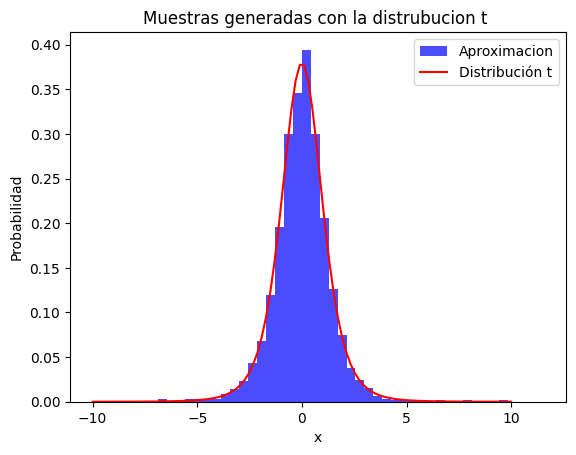

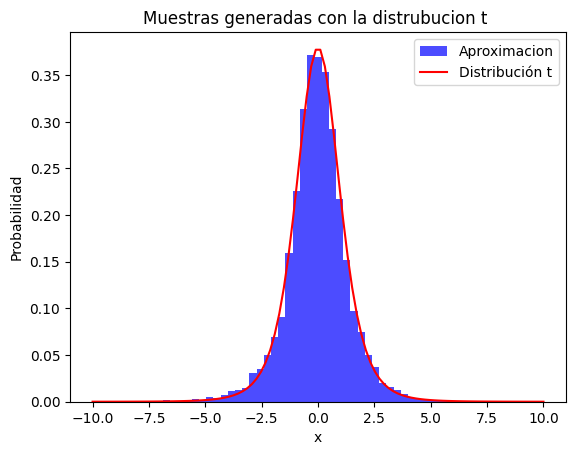

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Definimos la distribución objetivo: una distribución t de Student con nu grados de libertad
def target_distribution(x, nu):
    return t.pdf(x, nu)

# Algoritmo Metropolis-Hastings
def metropolis_hastings(target_dist, nu, proposal_std, num_samples, initial_value):
    samples = []
    current_sample = initial_value

    for _ in range(num_samples):
        # Proponer un nuevo valor de una distribución normal con la media en el valor actual
        proposal = np.random.normal(current_sample, proposal_std)

        # Calcular la probabilidad de aceptación
        acceptance_ratio = min(1, target_dist(proposal, nu) / target_dist(current_sample, nu))

        # Aceptar o rechazar la nueva muestra
        if np.random.rand() < acceptance_ratio:
            current_sample = proposal

        # Almacenar la muestra
        samples.append(current_sample)

    return np.array(samples)

# Parámetros del algoritmo
num_samples = 10000
proposal_std = 2.0
initial_value = 0.0
degrees_of_freedom = 5  # Grados de libertad de la distribución t de Student

# Generar las muestras
samples = metropolis_hastings(target_distribution, degrees_of_freedom, proposal_std, num_samples, initial_value)

# Graficar las muestras
plt.hist(samples, bins=50, density=True, alpha=0.7, color='b', label='Aproximacion')
x = np.linspace(-10, 10, 100)
plt.plot(x, t.pdf(x, degrees_of_freedom), 'r', label='Distribución t')
plt.title('Muestras generadas con la distrubucion t ')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()